### Labb 2 

- a) Börja med att ladda ned datasetet Dogs vs Cats från Kaggle. Extrahera den och lägg den i din labfolder,
glöm inte att lägga till den till .gitignore.

-----


## b)

 - Läs in 10 bilder slumpmässigt, plotta dem och extrahera deras labels och skriv ut i titeln.


In [35]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os # Used for interacting with the operating system. Essential for file and directory operations.
import random
from PIL import Image # Part of the Pillow library, used for opening, manipulating, and saving many different image file formats.

In [36]:
# Set the directory path where the images are stored.
source_dir = "original_data/train/train"

# List all files in the specified directory and filter to include only '.jpg' files.
image_files = [f for f in os.listdir(source_dir) if f.endswith('.jpg')]

# Randomly select 10 images from the list of jpg files.
selected_images = random.sample(image_files, 10)

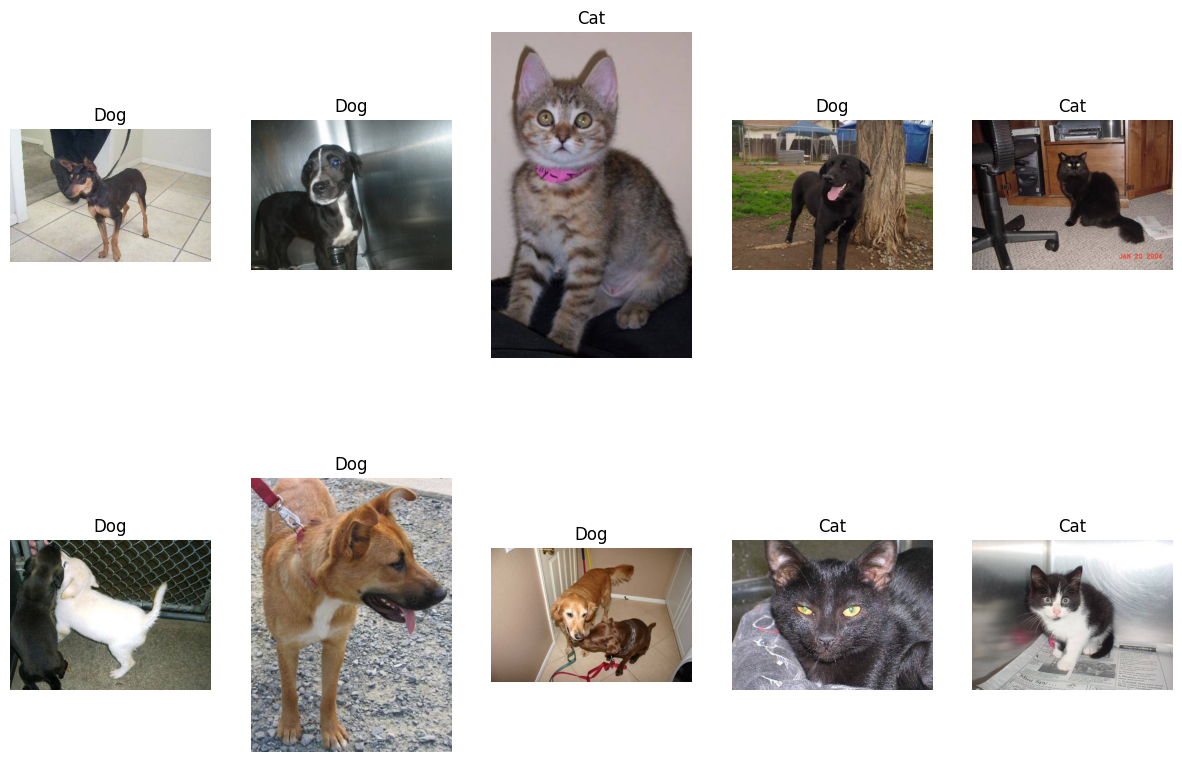

In [37]:
plt.figure(figsize=(15, 10))

# Loop through each selected image file.
for i, image_file in enumerate(selected_images):
    # Open the image file using the PIL library and join path components.
    img = Image.open(os.path.join(source_dir, image_file))
    
    # Determine the label ('Cat' or 'Dog') based on the presence of 'cat' in the file name.
    label = 'Cat' if 'cat' in image_file else 'Dog'
    
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(img) # Display the image in the current subplot.
    plt.title(label) # Set the title of the subplot to the label of the image.
    plt.axis('off')

plt.show()

------

## c)

- Skapa folderstrukturen nedan med Python

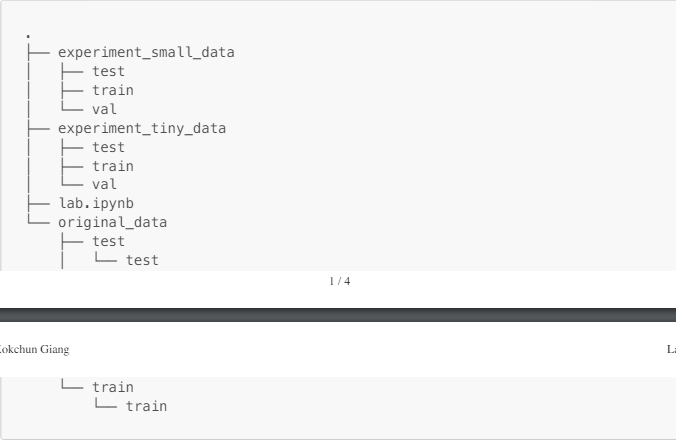     ---->      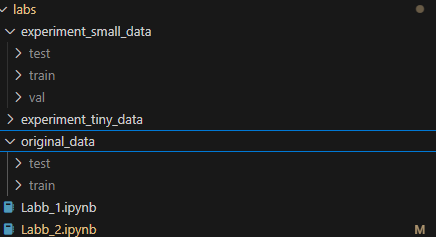
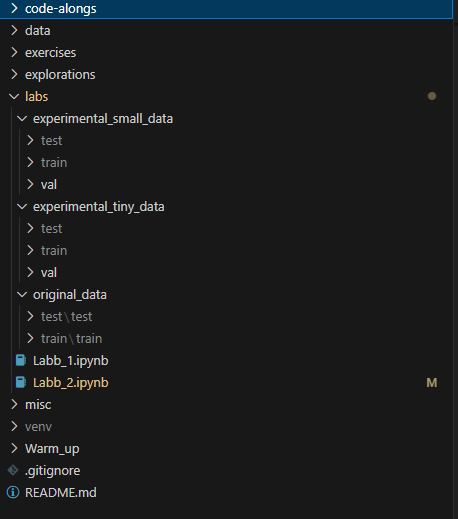

-----

### d)

- d) Nu ska du göra train|val|test split med följande splits:
    - experiment_small
    - train - 1600 (800 dogs, 800 cats)
    - val - 400 (200 dogs, 200 cats)
    - test - 500 (250 dogs, 250 cats)

Det är inte så farligt om det inte blir exakt balanserade dataset.
Det är viktigt att du samplar slumpmässigt utan replacement från originaldatasetet under respektive
experiment. Spara datan i deras respektive mappar. (**)


In [38]:
import os
import shutil
import random

base_dir = "experiment_small_data"
source_dir = "original_data/train/train"  

sets = ['train', 'val', 'test']

# Define number of pics for each category
split_counts = {
    'train': {'dogs': 800, 'cats': 800},
    'val': {'dogs': 200, 'cats': 200},
    'test': {'dogs': 250, 'cats': 250}
}

def check_if_distribution_needed():
    # Check if distributuion already has been done.
    for set in sets:
        path = os.path.join(base_dir, set)
        if sum(len(files) for _, _, files in os.walk(path)) != sum(split_counts[set].values()):
            return True
    return False

def distribute_files():
    if not check_if_distribution_needed():
        print("Fördelning har redan slutförts. Inga ytterligare åtgärder krävs.")
        return

    # shuffle all files for ranodomness
    files = {'dogs': [f for f in os.listdir(source_dir) if 'dog' in f], 'cats': [f for f in os.listdir(source_dir) if 'cat' in f]}
    for category in files:
        random.shuffle(files[category])

    # move files 
    for set in sets:
        for category in files:
            amount = split_counts[set][category]
            selected_files = files[category][:amount]
            files[category] = files[category][amount:]  

            for file in selected_files:
                shutil.move(os.path.join(source_dir, file), os.path.join(base_dir, set, file))

distribute_files()


Fördelning har redan slutförts. Inga ytterligare åtgärder krävs.


In [39]:
directories = ["experiment_small_data/train", "experiment_small_data/test", "experiment_small_data/val"]


def count_files(directory):
    dog_count = sum('dog' in f for f in os.listdir(directory))
    cat_count = sum('cat' in f for f in os.listdir(directory))
    return dog_count, cat_count


for directory in directories:
    dogs, cats = count_files(directory)
    print(f"{directory}:")
    print("Dogs:", dogs)
    print("Cats:", cats)



experiment_small_data/train:
Dogs: 800
Cats: 800
experiment_small_data/test:
Dogs: 250
Cats: 250
experiment_small_data/val:
Dogs: 200
Cats: 200


----------

### e) 
Läs in dataseten från experiment_small, experiment_tiny (BONUS) och plocka ut labelsvektorer, som
ska vara one-hot encoded med 0 och 1.
- plotta några bilder med deras respektive labels och kontrollera att det är korrekt.
- skapa lämplig plot för att kontrollera att dataseten är balanserade
- skapa lämplig plot för att kontrollera att dataseten är slumpade, dvs inte ex [0, 0, ... 0, 1, 1, ..., 1]




Funktion som laddar bilder från en mapp och extraherar deras labels.
- Blandar ordningen på filnamnen. Detta säkerställer att ordningen på filerna i mappen är slumpmässig innan bilderna laddas och etiketterna extraheras
- Loopar igenom filer i mapp (directory).
- Laddar varje bild och konverterar den till en numpy-array.
- Justerar storleken på bilderna till en önskad målstorlek (224x224 pixlar).
- Hämtar etiketten för varje bild baserat på filnamnet (om "dog" finns i filnamnet sätts etiketten till 0, annars sätts den till 1).
- Returnerar bilder och etiketter som numpy-arrays.

Etiketterna för bilderna i tränings-, validerings- och testmapparna konverteras till one-hot encoding-formatet.



In [47]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
from tensorflow.keras.utils import to_categorical


def load_images_and_labels(directory, target_size=(224, 224)):
    # Get a list of filenames in the directory
    file_names = os.listdir(directory)
    # Shuffle the list to randomize the order of files
    random.shuffle(file_names)

    images = []  # List to store processed images
    labels = []  # List to store labels

    # Loop through the shuffled list of filenames
    for file in file_names:
        img_path = os.path.join(directory, file)  # Create the full path to the image file
        label = 0 if "dog" in file else 1  # Assign label based on the file name containing 'dog'

        try:
            img = load_img(img_path)  # Load the image
            img = img_to_array(img)  # Convert image to a numpy array
            img = img / 255.0  # Normalize pixel values to [0, 1]
            img = smart_resize(img, target_size)  # Resize image to target size
            images.append(img)  # Add the image to the list of images
            labels.append(label)  # Add the label to the list of labels
        except Exception as e:
            
            print(f"Error loading image: {img_path}. {e}")

    return np.array(images), np.array(labels)  # Return the lists as numpy arrays


train_dir = "experiment_small_data/train"
val_dir = "experiment_small_data/val"
test_dir = "experiment_small_data/test"

# Load images and labels from the directories
X_train, y_train = load_images_and_labels(train_dir)
X_val, y_val = load_images_and_labels(val_dir)
X_test, y_test = load_images_and_labels(test_dir)

# One-hot encode the labels for use with categorical crossentropy
num_classes = 2
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)




In [48]:
X_train.shape, X_test.shape, X_val.shape

((1600, 224, 224, 3), (500, 224, 224, 3), (400, 224, 224, 3))

plotta några bilder med deras respektive labels och kontrollera att det är korrekt
- ser korrekt ut

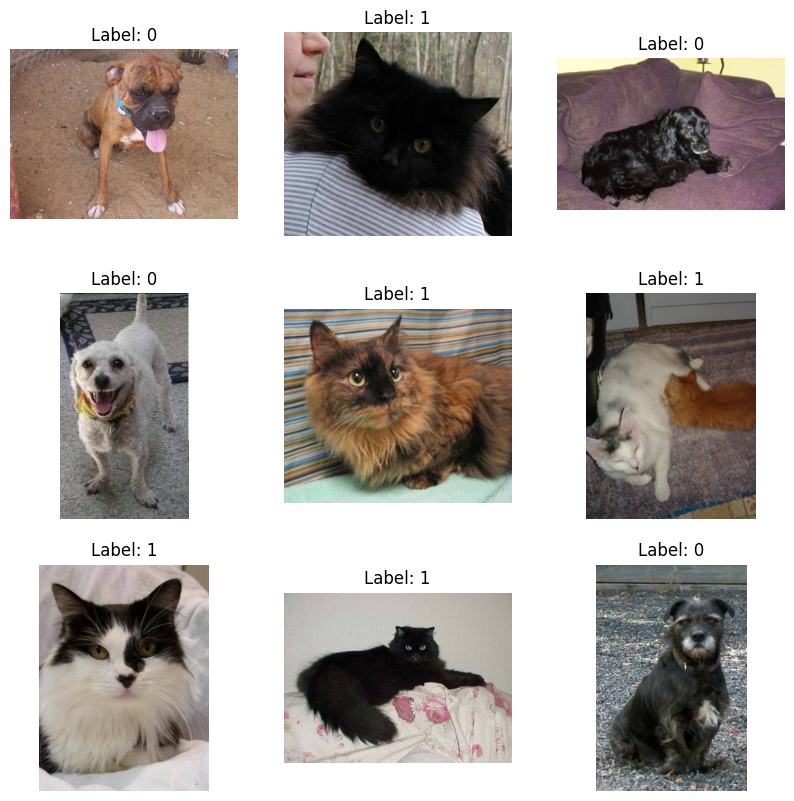

In [49]:
num_images = 9  
plt.figure(figsize=(10, 10))

# Pick random images from training folder
train_files = os.listdir(train_dir)
random_files = np.random.choice(train_files, size=num_images, replace=False)

for i, file in enumerate(random_files):
    img_path = os.path.join(train_dir, file)
    img = load_img(img_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    
    # get label 
    label_index = 0 if 'dog' in file.split('.')[0] else 1  # 0 for dog 1 for cat
    plt.title("Label: " + str(label_index))  
    plt.axis("off")

plt.show()

skapa lämplig plot för att kontrollera att dataseten är balanserade


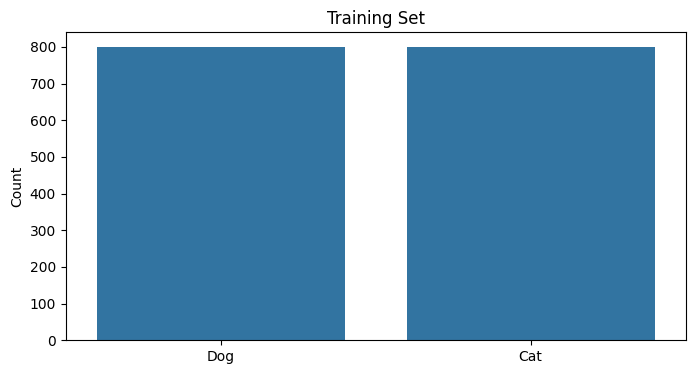

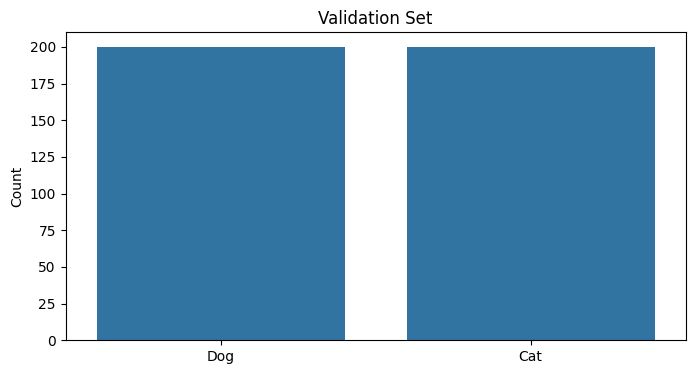

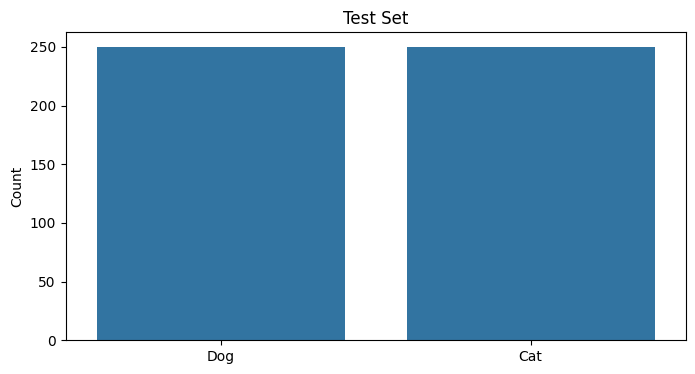

In [50]:
def plot_class_distribution(y_data, title):
    
    class_sums = np.sum(y_data, axis=0)
    classes = ['Dog', 'Cat']
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=classes, y=class_sums)
    plt.title(title)
    plt.ylabel('Count')
    plt.show()


plot_class_distribution(y_train, "Training Set")
plot_class_distribution(y_val, "Validation Set")
plot_class_distribution(y_test, "Test Set")




skapa lämplig plot för att kontrollera att dataseten är slumpade, dvs inte ex
[0, 0, ... 0, 1, 1, ..., 1]

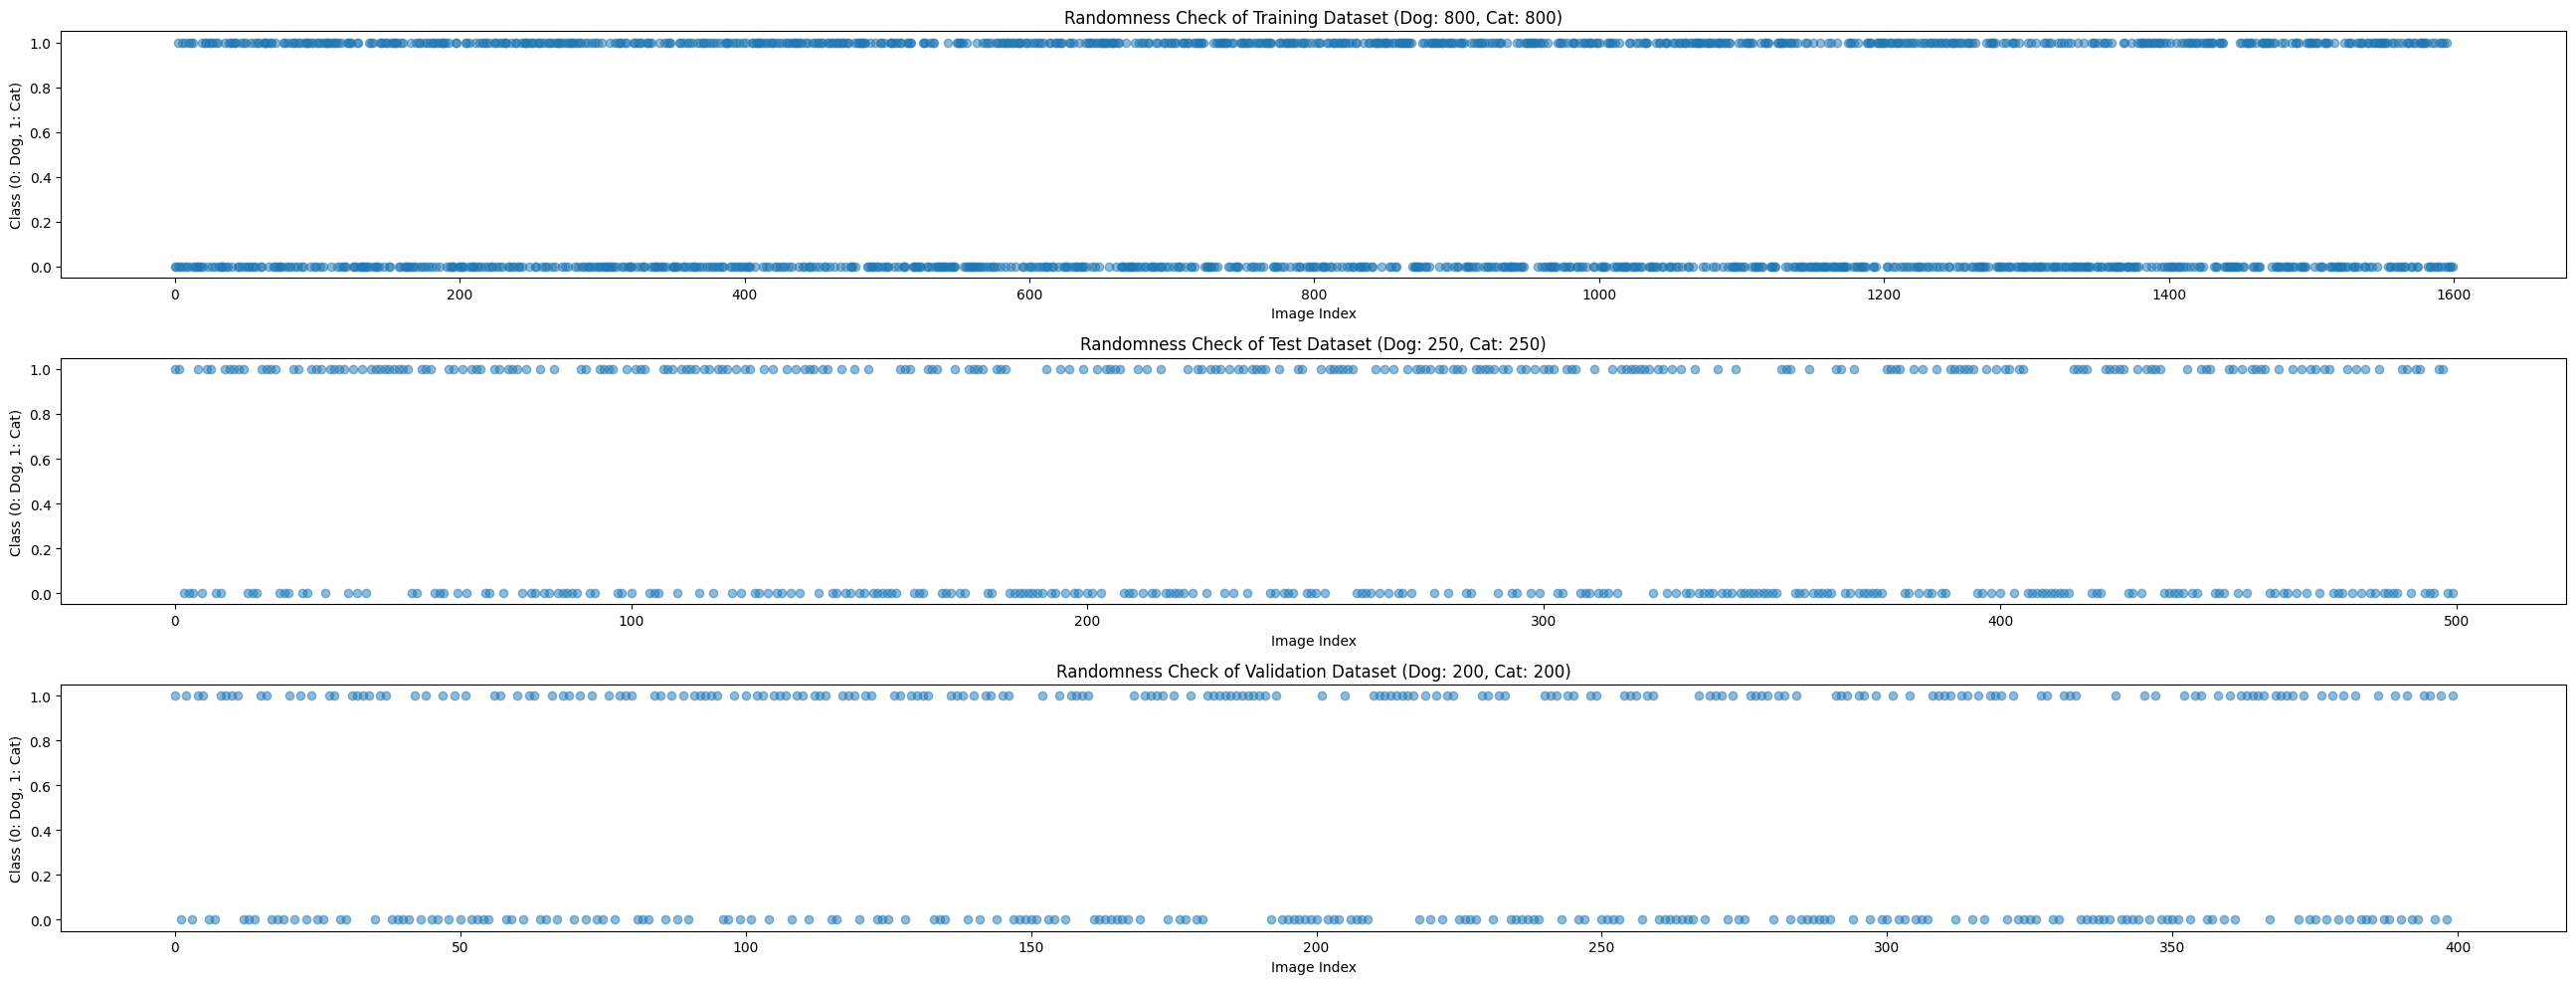

In [82]:
# Count the occurrences of each class in the training, test, and validation data
train_class_counts = np.bincount(y_train.argmax(axis=1))
test_class_counts = np.bincount(y_test.argmax(axis=1))
val_class_counts = np.bincount(y_val.argmax(axis=1))

# Create three line plots to show the distribution of classes in the training, test, and validation data
plt.figure(figsize=(26, 10))

# Training data
plt.subplot(3, 1, 1)
plt.plot(range(len(y_train)), y_train.argmax(axis=1), marker='o', linestyle='', alpha=0.5)
plt.title(f'Randomness Check of Training Dataset (Dog: {train_class_counts[0]}, Cat: {train_class_counts[1]})')
plt.xlabel('Image Index')
plt.ylabel('Class (0: Dog, 1: Cat)')

# Test data
plt.subplot(3, 1, 2)
plt.plot(range(len(y_test)), y_test.argmax(axis=1), marker='o', linestyle='', alpha=0.5)
plt.title(f'Randomness Check of Test Dataset (Dog: {test_class_counts[0]}, Cat: {test_class_counts[1]})')
plt.xlabel('Image Index')
plt.ylabel('Class (0: Dog, 1: Cat)')

# Validation data
plt.subplot(3, 1, 3)
plt.plot(range(len(y_val)), y_val.argmax(axis=1), marker='o', linestyle='', alpha=0.5)
plt.title(f'Randomness Check of Validation Dataset (Dog: {val_class_counts[0]}, Cat: {val_class_counts[1]})')
plt.xlabel('Image Index')
plt.ylabel('Class (0: Dog, 1: Cat)')

plt.tight_layout()
plt.show()





-----

### 1. Bildbehandling (*)

Uppgifterna nedan ska upprepas för respektive experimentdataset om du också väljer att arbeta med
tinydatasetet.
- a) Skapa en plot för att visualisera bildstorlekarna i träningsdatan. Använd seaborns jointplot.
- b) Välj en lämplig bildstorlek att ändra samtliga bilder till. Gör en analys och fundera på om du behöver
slänga bilder. Hur kommer du fram till ditt val?
- c) Gör resize sådant att samtliga bilder är samma storlek och spara dem i numpy arrays med följande
struktur:
(samples, row, cols, color_channels)